<a href="https://colab.research.google.com/github/millennial-geoscience/Common_Ss_geodata_examples/blob/main/Volve_rock_physics_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/yohanesnuwara/volve-machine-learning/main/well_logs/15_9-F-1B.LAS
#!wget https://raw.githubusercontent.com/yohanesnuwara/volve-machine-learning/main/well_logs/15_9-F-11B.LAS
!wget https://raw.githubusercontent.com/yohanesnuwara/volve-machine-learning/main/well_logs/15_9-F-1A.LAS
!wget https://raw.githubusercontent.com/yohanesnuwara/volve-machine-learning/main/well_logs/15_9-F-11A.LAS

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install lasio
import lasio
!pip install las
from las import LASReader

In [51]:
b52 = LASReader('/content/15_9-F-11A.LAS', null_subs = np.nan)
print(b52.curves.names)

['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']


In [ ]:
w1 = lasio.read('/content/15_9-F-11A.LAS')
w2 = lasio.read('/content/15_9-F-1A.LAS')
w3 = lasio.read('/content/15_9-F-1B.LAS')
df1 = w1.df()
df2 = w2.df()
df3 = w3.df()
well1 = df1.reset_index()
well2= df2.reset_index()
well3 = df3.reset_index()

In [90]:
well1['Vp'] = (well1['DT']/304799.902)**-1
well1['Vs'] = (well1['DTS']/304799.902)**-1
well1['VpVs'] = well1['Vp']/well1['Vs']
well1['AI'] = (well1['Vp'])*(well1['RHOB'])

well2['Vp'] = (well2['DT']/304799.902)**-1
well2['Vs'] = (well2['DTS']/304799.902)**-1
well2['VpVs'] = well2['Vp']/well1['Vs']
well2['AI'] = (well2['Vp'])*(well1['RHOB'])

well3['Vp'] = (well3['DT']/304799.902)**-1
well3['Vs'] = (well3['DTS']/304799.902)**-1
well3['VpVs'] = well3['Vp']/well1['Vs']
well3['AI'] = (well3['Vp'])*(well1['RHOB'])

In [ ]:
min = 3000
max = 3600
well = well1.loc[(well1['DEPTH'] > min) & (well1['DEPTH'] < max)]  # train wells: well1, well3, well4

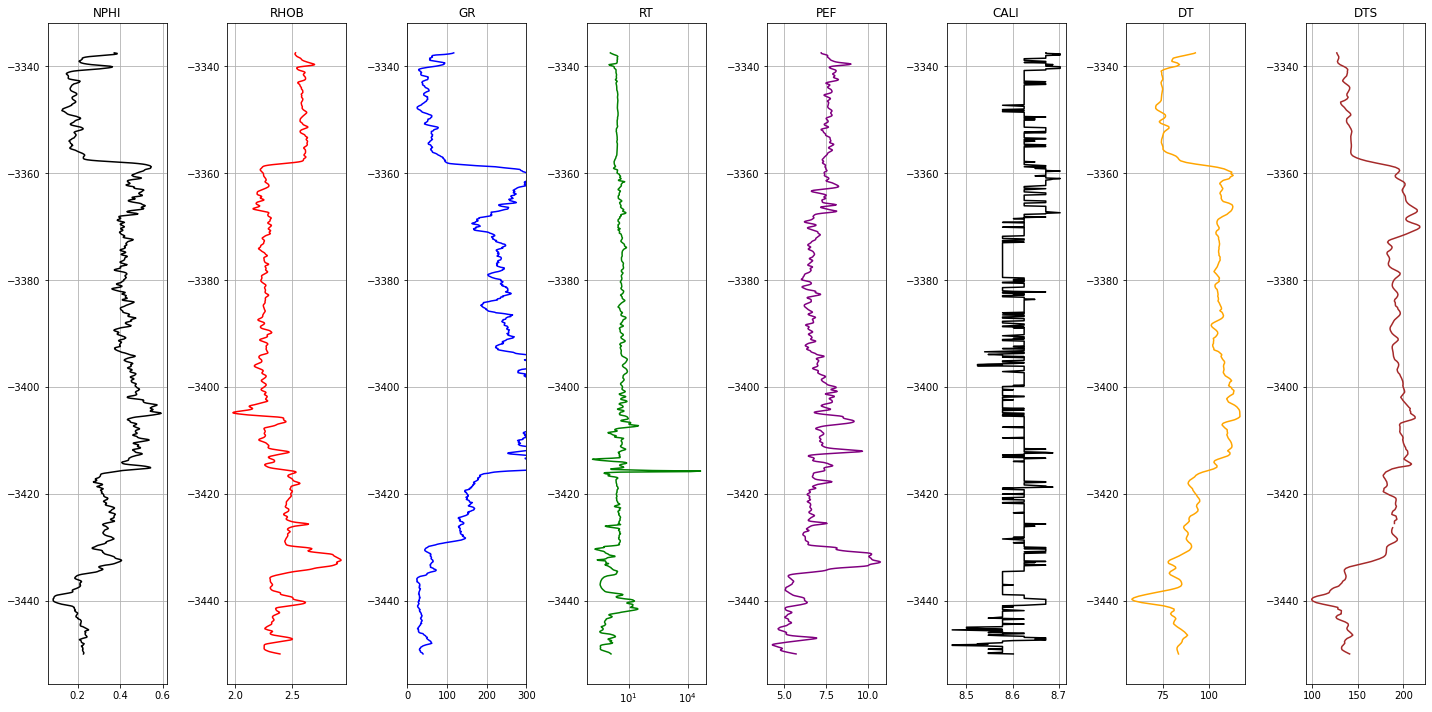

In [137]:
min = 3380
max = 3450
well = well2.loc[(well1['DEPTH'] > min) & (well2['DEPTH'] < max)]  # train wells: well1, well3, well4

# define what logs are we going to us
logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT', 'DTS']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange', 'brown']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH']*-1, color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH']*-1, color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 300)
plt.tight_layout(1.1)
plt.show()

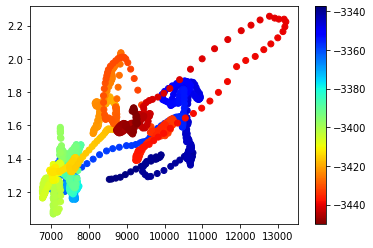

In [138]:
plt.scatter(well['AI'],well['VpVs'], c=well['DEPTH']*-1,cmap='jet_r')
plt.colorbar()

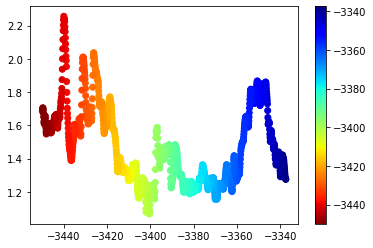

In [139]:
plt.scatter(well['DEPTH']*-1,well['VpVs'], c=well['DEPTH']*-1,cmap='jet_r')
plt.colorbar()

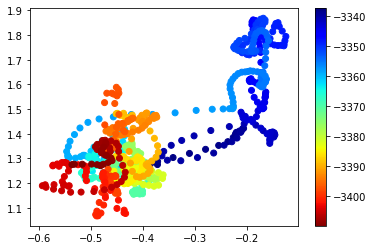

In [134]:
plt.scatter(well['NPHI']*-1,well['VpVs'], c=well['DEPTH']*-1,cmap='jet_r')
plt.colorbar()

In [89]:
plt.figure(figsize = (3,10))
plt.plot(well['GR'], well['DEPTH'], color='green')